# モンティ・ホール問題をゲーム化してDQNにプレーさせてみた

機械学習は、[演繹的（論理学的）アプローチから、帰納的（統計学的）アプローチへのパラダイム転換なんだ](https://qiita.com/tanuk1647/items/cdf2f18335008a428bf8#%E7%A7%81%E3%81%AE%E7%90%86%E8%A7%A3)と、私は考えています。

さて、[前回の記事](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)では、論理的解答と直感的解答の食い違う問題の代表選手として、**モンティ・ホール問題**を取り上げ、機械学習（強化学習）の手法で、統計的に解きました。

今回は、このモンティ・ホール問題を、**DQN（deep Q-network）**と呼ばれる手法で解いてみたいと思います。

## モンティ・ホール問題

プレーヤーの前に閉まった3つのドアがあって、1つのドアの後ろには景品の新車が、2つのドアの後ろには、はずれを意味するヤギがいる。プレーヤーは新車のドアを当てると新車がもらえる。プレーヤーが1つのドアを選択した後、司会のモンティが残りのドアのうちヤギがいるドアを開けてヤギを見せる。

ここでプレーヤーは、最初に選んだドアを、残っている開けられていないドアに変更してもよいと言われる。プレーヤーはドアを変更すべきだろうか？

[Wikipedia『モンティ・ホール問題』](https://ja.wikipedia.org/wiki/%E3%83%A2%E3%83%B3%E3%83%86%E3%82%A3%E3%83%BB%E3%83%9B%E3%83%BC%E3%83%AB%E5%95%8F%E9%A1%8C)

## 問題の正解

直感的には、こう考えがちです。「2つのドアが残っており、そのどちらかに景品の新車がある。したがって、確率は五分五分、すなわち、ドアを変更しようがしまいが、当たる確率は同じである」と。

しかし、論理的には、ドアを変更するのが正解です。ドアを変更することにより、当たりを引く確率が2倍（1/3→2/3）となるためです。これは、[ベイズの定理を用いる方法](https://qiita.com/ysk24ok/items/c87a73fd2ee16091ec91)で示すことができます。

あるいは、以下のように考えれば、最初に外れのドアを選ぶ確率が高い分、ドアを変更したほうが良いことが、直感的にも理解して頂けるかと思います。

- 最初に選んだドアが外れ（確率：2/3）の場合、**モンティがもう一つの外れを開けてくれる**ため、ドアを変更すれば必ず当たる。
- 最初に選んだドアが当たり（確率：1/3）の場合、残りのドアには外れしかないため、ドアを変更すれば必ず外れる。

本記事では、[前回](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)同様、Pythonを使って、統計的に解きたいと思います。

## モンティ・パイソンな方々

Qiitaでモンティ・ホール問題をPythonで解かれている方々です。

- [モンティ・ホール問題を解く](https://qiita.com/ynakayama/items/1e1693503e27ce33e0a0)
- [「モンティ・ホール問題」の簡単なシミュレーションプログラムを書いてみる](https://qiita.com/neko_the_shadow/items/0720fa0fe41260dbbf8c)
- [モンティ・ホール問題をコード書いて勝率計算したらすごく納得した話](https://qiita.com/shngt/items/b00f9f7460ca3807598f)
- [君は、モンティ・ホール問題を理解しているか?](https://qiita.com/gyu-don/items/0aaad14ebb2f0771839d)
- [モンティ・ホール問題をプログラミングで解く](https://qiita.com/mastar_3104/items/a227f3665b95ffe73a36)
- [モンティ・ホール問題を機械学習（強化学習）で解く](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)

本記事の特徴は、モンティ・ホール問題を、機械学習の手法——なかでも**DQN（deep Q-network）**と呼ばれる手法——を用いて解くところにあります。

## DQNとは

以下の記事や書籍が詳しく、わかりやすく、勉強になります。

- [ゼロからDeepまで学ぶ強化学習](https://qiita.com/icoxfog417/items/242439ecd1a477ece312)
- [強化学習入門 ～これから強化学習を学びたい人のための基礎知識～ ](http://blog.brainpad.co.jp/entry/2017/02/24/121500)
- [小高知宏（2018）『機械学習(マシンラーニング)と深層学習(ディープラーニング)』オーム社](http://iss.ndl.go.jp/books/R100000002-I028959772-00)

一言でいえば、DQNとは、機械学習の一種である強化学習（Q学習）において、Q値——ある行動から得られる報酬の見込みに比例した数値であり、行動指針となるもの——をニューラルネットワークで近似する手法となります。

というよりも、「ブロック崩し」のような往年のビデオゲームを何度も繰り返しプレーして、ルールを覚えて、コツを掴んで、攻略法まで編み出してしまうすごいやつ、といったほうが通りが良いかもしれませんね。

[![DQN Breakout](http://img.youtube.com/vi/TmPfTpjtdgg/0.jpg)](http://www.youtube.com/watch?v=TmPfTpjtdgg)

DQNの実装が「Keras-RL」というパッケージで提供されています。また、Keras-RLでプレーできるゲームが「OpenAI Gym」として提供されています。これらをインストールすることで、DQNをすぐに試してみることができます。

そのことを知ったとき、私は、モンティ・ホール問題をゲーム化して、DQNにプレーさせてみたいと思いました。細かいルールなんて教えなくても、攻略法——最初に選んだドアを変更——を編み出してくれるんだよね、ということを確かめてみたくなったのです。

## プログラム説明

### パッケージのインポート

結構、いろいろなパッケージをインポートします。

```python
import sys
from os import mkdir
from os.path import exists
from sys import exc_info
import numpy as np
import gym
from gym import spaces
from gym.utils import seeding
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import TrainIntervalLogger, TrainEpisodeLogger
import matplotlib.pyplot as plt
```

私の環境は[Python＋Pipenv](https://qiita.com/tanuk1647/items/cad362af79f528a5c348)ですので、仮想環境を作成し、TensorFlowとKerasをインストールしたのち、以下コマンドで、Keras-RLとOpenAI Gymをインストールしました。

```bash
$ pipenv install keras-rl
$ pipenv install gym
```

ちなみに、バージョン、依存関係はこうなっています。

```
gym==0.10.5
  - numpy [required: >=1.10.4, installed: 1.14.5]
  - pyglet [required: >=1.2.0, installed: 1.3.2]
    - future [required: Any, installed: 0.16.0]
  - requests [required: >=2.0, installed: 2.19.1]
    - certifi [required: >=2017.4.17, installed: 2018.8.13]
    - chardet [required: >=3.0.2,<3.1.0, installed: 3.0.4]
    - idna [required: >=2.5,<2.8, installed: 2.7]
    - urllib3 [required: >=1.21.1,<1.24, installed: 1.23]
  - six [required: Any, installed: 1.11.0]

keras-rl==0.4.2
  - keras [required: >=2.0.7, installed: 2.2.2]
    - h5py [required: Any, installed: 2.8.0]
      - numpy [required: >=1.7, installed: 1.14.5]
      - six [required: Any, installed: 1.11.0]
    - keras-applications [required: ==1.0.4, installed: 1.0.4]
      - h5py [required: Any, installed: 2.8.0]
        - numpy [required: >=1.7, installed: 1.14.5]
        - six [required: Any, installed: 1.11.0]
      - numpy [required: >=1.9.1, installed: 1.14.5]
    - keras-preprocessing [required: ==1.0.2, installed: 1.0.2]
      - numpy [required: >=1.9.1, installed: 1.14.5]
      - scipy [required: >=0.14, installed: 1.1.0]
        - numpy [required: >=1.8.2, installed: 1.14.5]
      - six [required: >=1.9.0, installed: 1.11.0]
    - numpy [required: >=1.9.1, installed: 1.14.5]
    - pyyaml [required: Any, installed: 3.13]
    - scipy [required: >=0.14, installed: 1.1.0]
      - numpy [required: >=1.8.2, installed: 1.14.5]
    - six [required: >=1.9.0, installed: 1.11.0]
```

### モンティ

続いては、モンティです。コンストラクタで乱数ジェネレータを受け取るなど、[前回](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)とは少し変わっていますが、司会者としての役目を忠実にこなしているのは同じです。

正解の場合には報酬として1000点を、不正解の場合には0点を与えます。

```python
class Monty:
    def __init__(self, np_random):
        self.np_random = np_random
    
    def reset(self):
        # ゲームを初期化
        self.doors = np.zeros(3)
        self.choices = np.zeros(3)
        self.car = np.zeros(3)
        self.car[self.np_random.randint(3)] = 1.
    
    def open(self, choice):
        # プレーヤーの選択を反映
        self.choices[choice] = 1.
        
        # ドアを一つ開放
        t = self.car + self.choices
        t_choices = np.where(t == 0.)[0]
        self.doors[self.np_random.choice(t_choices)] = 1.
    
    def judge(self, choice):
        # プレーヤーの選択を反映
        self.choices = np.zeros(3)
        self.choices[choice] = 1.
        
        # 正解判定
        t = self.choices.argmax()
        u = self.car.argmax()
        judgement = 1000. if t == u else 0.
        
        return judgement
```

### モンティ・ホール（ゲーム）

少しややこしくなってくるのが、モンティ・ホール（ゲーム）のクラスです。以下の記事、ソースを参考にしつつ、実装していきます。

- [OpenAI Gym で自前の環境をつくる](https://qiita.com/ohtaman/items/edcb3b0a2ff9d48a7def)
- [openai/gym/gym/core.py](https://github.com/openai/gym/blob/master/gym/core.py)
- [openai/gym/gym/envs/cartpole](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

**クラスの初期化**

```python
class MontyHall(gym.Env):
    metadata = {
        'render.modes': ['human', 'ansi']
    }
    reward_range = [0., 1000.]
    
    def __init__(self):
        super().__init__()
        # action_space, observation_space, reward_range を設定する
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(
            low=0, high=2, shape=(2, 3),
            dtype='float32')
        self.seed()
        self.m = Monty(self.np_random)
        self.reset()
    
    def reset(self):
        # 諸々の変数を初期化する
        self.steps = 0
        self.choiced = -1
        self.m.reset()
        observation = [self.m.doors.copy(), self.m.choices.copy()]
        return observation
```

gym.Envを継承のうえ、必要なメソッドを実装などしていきます。ここでのポイントは、行動空間（action_space）と観測空間（observation_space）を定義すること、および、resetメソッドを実装することです。

行動空間は、ドアの選択肢が3つあるので、3の「幅」を持ちます。観測空間は、3つあるドアの開放状態、および、選択状態となるので、2x3の「広さ」を持ちます。つまり、shapeは(2, 3)です。コードと説明が前後しますが、開放状態、および、選択状態は、いずれも、有りか無しかの2値を持つので、その「高さ」は2となります。DQNのエージェントは、ここで定義された観測空間を観測し、行動空間の中で行動することになります。

行動空間の幅が常に3ということは、モンティが外れと示したドアをプレーヤーが選ぶ可能性を排除していない、ということですが、それくらい、DQN様なら自己学習してくれることでしょう。

resetメソッドは、コンストラクタ内で利用していますが、ゲームの状態をリセットする際にDQN側からも利用されるので、実装が必須です。

**seedメソッド**

```python
    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
```

seedメソッドは、乱数ジェネレータにランダムなシードをセットし、かつ、セットしたシードを返すメソッドです。[gym.Envのソースコメント](https://github.com/openai/gym/blob/master/gym/core.py)によると、複数の乱数ジェネレータを用い、かつ、それらの間に偶然の相関関係を発生させたくないゲームで利用するようです。実装は必須ではありません。

本ゲームでは、必ずしも使う必要がありませんが、何事も経験ということで、[既存ゲーム](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)の真似をして、実装、利用してみました。

**stepメソッド**

```python
    def step(self, action):
        # 1ステップ進める処理を記述
        # 戻り値は observation, reward, done(ゲーム終了したか), info(追加の情報の辞書)
        if self.steps == 0:
            self.steps += 1
            self.choiced = action
            self.m.open(action)
            observation = [self.m.doors.copy(), self.m.choices.copy()]
            reward = 0.
            done = False
        elif self.steps == 1:
            self.steps += 1
            self.choiced = action
            reward = self.m.judge(action)
            observation = [self.m.doors.copy(), self.m.choices.copy()]
            done = True
            
        return observation, reward, done, {}
```

stepメソッドは、ゲームを1ステップ進めるメソッドです。実装は必須です。本ゲームでは、ドアの選択、再選択を行うのみですから、2ステップ実装すれば足ります。具体的な仕事はモンティがやってくれるので、楽勝ですね。

**renderメソッド**

```python
    def render(self, mode='human', close=False):
        # humanの場合はコンソールに出力、ansiの場合はStringIOを返す
        if mode == 'ansi':
            outfile = StringIO()
        elif mode == 'human':
            outfile = sys.stdout
        else:
            # just raise an exception
            super().render(mode=mode)
        
        strs = [i for i in range(8)]
        strs[0] = '\n'
        strs[1] = '|-----|  |-----|  |-----|\n'
        strs[2] = '|  0  |  |  1  |  |  2  |\n'
        strs[3] = '|     |  |     |  |     |\n'
        
        if self.steps == 0:
            strs[4] = '| ??? |  | ??? |  | ??? |\n'
        elif self.steps == 1:
            idx = np.where(self.m.doors == 1.)[0][0]
            if idx == 0:
                strs[4] = '|  x  |  | ??? |  | ??? |\n'
            elif idx == 1:
                strs[4] = '| ??? |  |  x  |  | ??? |\n'
            elif idx == 2:
                strs[4] = '| ??? |  | ??? |  |  x  |\n'
        elif self.steps == 2:
            idx = np.where(self.m.car == 1.)[0][0]
            if idx == 0:
                strs[4] = '| CAR |  |  x  |  |  x  |\n'
            elif idx == 1:
                strs[4] = '|  x  |  | CAR |  |  x  |\n'
            elif idx == 2:
                strs[4] = '|  x  |  |  x  |  | CAR |\n'
        
        strs[5] = '|     |  |     |  |     |\n'
        strs[6] = '|-----|  |-----|  |-----|\n'
        
        if self.steps == 0:
            strs[7] = '(     )  (     )  (     )\n'
        elif self.steps >= 1:
            if self.choiced == 0:
                strs[7] = '( chk )  (     )  (     )\n'
            elif self.choiced == 1:
                strs[7] = '(     )  ( chk )  (     )\n'
            elif self.choiced == 2:
                strs[7] = '(     )  (     )  ( chk )\n'
        
        outfile.write(''.join(strs))
        return outfile
```

renderメソッドは、画面をレンダリングするメソッドです。実装は必須です。本ゲームは、コンソールで遊ぶゲームということで、ひたすら文字列を生成しています。手を抜こうと思えば手を抜ける部分ですが、最低限のリアリティを追求しました。

**closeメソッド**

```python
    def close(self):
        # just return
        super().close()
```

closeメソッドは、各種のクリーンアップ処理をおこなうメソッドです。実装は必須ではありません。[既存ゲーム](https://github.com/openai/gym/tree/master/gym/envs)を見ると、グラフィカルな画面を持つゲームでは、closeメソッドで画面のクローズ処理を行い、リソースを解放しているようです。本ゲームでは、特にすることがありません。

**playメソッド**

```python
    def play(self):
        self.reset()
        self.render()
        print('３つのドアのどれかが当たりです。')
        self.step(self.__input())
        self.render()
        print('モンティが１つ、はずれ（x）のドアを開けてくれました。')
        print('再度、選択しても良いようです。')
        _, reward, _, _ = self.step(self.__input())
        self.render()
        if reward > 0.:
            print('当たりです、おめでとうございます！')
        else:
            print('はずれです、残念でした…')
    
    def __input(self):
        while True:
            print('当たりと思うドアの番号を入力してください。[0-2]')
            i = input()
            if i in ['0', '1', '2']:
                break
        return int(i)
```

playメソッドは、人間がプレーするためのメソッドです。私が勝手に実装したものであり、実装は必須ではありません。

DQNのために定義した、reset、render、stepメソッドを利用して、人間がプレーできるようにしています。

### DQNのロガー

さて、ゲームを作り終えたので、今度はゲームをプレーする側（DQN）を作りましょう。

まずは、訓練状況を可視化するためにロガーを作ります。DQNAgentのfitメソッドがhistoryを返してくれますが、中身を見る限り、どうもうまくいきそうに思えなかったので、以下記事、ソースを参考に、ロガーを自作することにしました。

- [\[Python\] Keras-RLで簡単に強化学習(DQN)を試す/テストと結果の描画](https://qiita.com/inoory/items/e63ade6f21766c7c2393#%E3%83%86%E3%82%B9%E3%83%88%E3%81%A8%E7%B5%90%E6%9E%9C%E3%81%AE%E6%8F%8F%E7%94%BB)
- [keras-rl/rl/callbacks.py](https://github.com/keras-rl/keras-rl/blob/master/rl/callbacks.py)

```python
class TrainIntervalLogger2(TrainIntervalLogger):
    def __init__(self, interval=10000):
        super().__init__(interval=interval)
        self.records = {}
    
    def on_train_begin(self, logs):
        super().on_train_begin(logs)
        self.records['interval'] = []
        self.records['episode_reward'] = []
        for metrics_name in self.metrics_names:
            self.records[metrics_name] = []
    
    def on_step_begin(self, step, logs):
        if self.step % self.interval == 0:
            if len(self.episode_rewards) > 0:
                self.records['interval'].append(self.step // self.interval)
                self.records['episode_reward'].append(np.mean(self.episode_rewards))
                metrics = np.array(self.metrics)
                assert metrics.shape == (self.interval, len(self.metrics_names))
                if not np.isnan(metrics).all():  # not all values are means
                    means = np.nanmean(self.metrics, axis=0)
                    assert means.shape == (len(self.metrics_names),)
                    for name, mean in zip(self.metrics_names, means):
                        self.records[name].append(mean)
        super().on_step_begin(step, logs)
```

TrainIntervalLoggerを継承し、拡張します。

訓練中に呼ばれるコールバック関数に処理を記述していきます。処理内容は、インターバルごとの報酬、指標（Q値）をレコードとして保持するというものです。こうすることで、Q値の収束状況を可視化することが可能となります。

### DQN

最後はDQNです。本質的な処理のみ抜き出して（訓練状況の可視化と重みの保存に関わる処理を除いて）以下に記載します。

```python
class DQNMontyHall:
    # モデルの初期化
    def __init__(self, recycle=True):
        # Get the environment and extract the number of actions.
        self.env = MontyHall()
        self.nb_actions = self.env.action_space.n
        
        # Next, we build a very simple model.
        self.model = Sequential()
        self.model.add(Flatten(input_shape=(1,) + self.env.observation_space.shape))
        self.model.add(Dense(256))
        self.model.add(Activation('relu'))
        self.model.add(Dense(self.nb_actions))
        self.model.add(Activation('linear'))
        #print(self.model.summary())
        
        # Finally, we configure and compile our agent.
        # You can use every built-in Keras optimizer and even the metrics!
        memory = SequentialMemory(limit=50000, window_length=1)
        policy = BoltzmannQPolicy(tau=1000)
        self.dqn = DQNAgent(model=self.model, nb_actions=self.nb_actions, memory=memory,
                            nb_steps_warmup=1000, target_model_update=1e-2, policy=policy)
        self.dqn.compile(Adam(lr=1e-3), metrics=[])
    
    # 訓練
    def train(self, nb_steps=30000, verbose=1, visualize=False, log_interval=3000):
        # 訓練実施
        # Okay, now it's time to learn something!
        # We visualize the training here for show, but this slows down training quite a lot.
        # You can always safely abort the training prematurely using Ctrl + C.
        hist = self.dqn.fit(self.env, nb_steps=nb_steps, 
                            callbacks=callbacks, verbose=verbose,
                            visualize=visualize, log_interval=log_interval)
        
        return hist
    
    # テスト
    def test(self, nb_episodes=10, visualize=True, verbose=1):
        # Finally, evaluate our algorithm for 5 episodes.
        hist = self.dqn.test(self.env, nb_episodes=nb_episodes,
                             verbose=verbose, visualize=visualize)
        return hist
```

Kerasと同レベルに抽象化されているので、シンプルに書けます。以下の記事やソースを参考にしつつ、モデルの初期化、訓練、テストと実装しました。

- [OpenAI Gym で自前の環境をつくる](https://qiita.com/ohtaman/items/edcb3b0a2ff9d48a7def#keras-rl-%E3%81%AE%E5%9F%BA%E6%9C%AC)
- [keras-rl/examples/dqn_cartpole.py](https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_cartpole.py)

モデルの初期化については、Kerasでニューラルネットワークを作成したのち、DQNのエージェントを作成し、コンパイルしています。ポリシーとしては、ボルツマン選択（BoltzmannQPolicy）を指定しました。Q値に基づいた確率的行動をとってくれるはずです。パラメータtauのデフォルト値は1ですが、より確率的に行動（＝探索）してもらうことをねらい、デフォルト値から変更しています。

訓練やテストについては、DQNのfitメソッド、testメソッドを呼び出すのみです。その際、作ったゲーム（環境）を渡してやります。

その他、ハイパーパラメータは、動かしながら調整しました。

## ソースコード

以下に、ソースコードの全体像を示します。

In [1]:
import sys
from os import mkdir
from os.path import exists
from sys import exc_info
import numpy as np
import gym
from gym import spaces
from gym.utils import seeding
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import TrainIntervalLogger, TrainEpisodeLogger
import matplotlib.pyplot as plt


class Monty:
    def __init__(self, np_random):
        self.np_random = np_random
    
    def reset(self):
        # ゲームを初期化
        self.doors = np.zeros(3)
        self.choices = np.zeros(3)
        self.car = np.zeros(3)
        self.car[self.np_random.randint(3)] = 1.
    
    def open(self, choice):
        # プレーヤーの選択を反映
        self.choices[choice] = 1.
        
        # ドアを一つ開放
        t = self.car + self.choices
        t_choices = np.where(t == 0.)[0]
        self.doors[self.np_random.choice(t_choices)] = 1.
    
    def judge(self, choice):
        # プレーヤーの選択を反映
        self.choices = np.zeros(3)
        self.choices[choice] = 1.
        
        # 正解判定
        t = self.choices.argmax()
        u = self.car.argmax()
        judgement = 1000. if t == u else 0.
        
        return judgement


class MontyHall(gym.Env):
    metadata = {
        'render.modes': ['human', 'ansi']
    }
    reward_range = [0., 1000.]
    
    def __init__(self):
        super().__init__()
        # action_space, observation_space, reward_range を設定する
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(
            low=0, high=2, shape=(2, 3),
            dtype='float32')
        self.seed()
        self.m = Monty(self.np_random)
        self.reset()
    
    def reset(self):
        # 諸々の変数を初期化する
        self.steps = 0
        self.choiced = -1
        self.m.reset()
        observation = [self.m.doors.copy(), self.m.choices.copy()]
        return observation
    
    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def step(self, action):
        # 1ステップ進める処理を記述
        # 戻り値は observation, reward, done(ゲーム終了したか), info(追加の情報の辞書)
        if self.steps == 0:
            self.steps += 1
            self.choiced = action
            self.m.open(action)
            observation = [self.m.doors.copy(), self.m.choices.copy()]
            reward = 0.
            done = False
        elif self.steps == 1:
            self.steps += 1
            self.choiced = action
            reward = self.m.judge(action)
            observation = [self.m.doors.copy(), self.m.choices.copy()]
            done = True
            
        return observation, reward, done, {}
    
    def render(self, mode='human', close=False):
        # humanの場合はコンソールに出力、ansiの場合はStringIOを返す
        if mode == 'ansi':
            outfile = StringIO()
        elif mode == 'human':
            outfile = sys.stdout
        else:
            # just raise an exception
            super().render(mode=mode)
        
        strs = [i for i in range(8)]
        strs[0] = '\n'
        strs[1] = '|-----|  |-----|  |-----|\n'
        strs[2] = '|  0  |  |  1  |  |  2  |\n'
        strs[3] = '|     |  |     |  |     |\n'
        
        if self.steps == 0:
            strs[4] = '| ??? |  | ??? |  | ??? |\n'
        elif self.steps == 1:
            idx = np.where(self.m.doors == 1.)[0][0]
            if idx == 0:
                strs[4] = '|  x  |  | ??? |  | ??? |\n'
            elif idx == 1:
                strs[4] = '| ??? |  |  x  |  | ??? |\n'
            elif idx == 2:
                strs[4] = '| ??? |  | ??? |  |  x  |\n'
        elif self.steps == 2:
            idx = np.where(self.m.car == 1.)[0][0]
            if idx == 0:
                strs[4] = '| CAR |  |  x  |  |  x  |\n'
            elif idx == 1:
                strs[4] = '|  x  |  | CAR |  |  x  |\n'
            elif idx == 2:
                strs[4] = '|  x  |  |  x  |  | CAR |\n'
        
        strs[5] = '|     |  |     |  |     |\n'
        strs[6] = '|-----|  |-----|  |-----|\n'
        
        if self.steps == 0:
            strs[7] = '(     )  (     )  (     )\n'
        elif self.steps >= 1:
            if self.choiced == 0:
                strs[7] = '( chk )  (     )  (     )\n'
            elif self.choiced == 1:
                strs[7] = '(     )  ( chk )  (     )\n'
            elif self.choiced == 2:
                strs[7] = '(     )  (     )  ( chk )\n'
        
        outfile.write(''.join(strs))
        return outfile
    
    def close(self):
        # just return
        super().close()
    
    def play(self):
        self.reset()
        self.render()
        print('３つのドアのどれかが当たりです。')
        self.step(self.__input())
        self.render()
        print('モンティが１つ、はずれ（x）のドアを開けてくれました。')
        print('再度、選択しても良いようです。')
        _, reward, _, _ = self.step(self.__input())
        self.render()
        if reward > 0.:
            print('当たりです、おめでとうございます！')
        else:
            print('はずれです、残念でした…')
    
    def __input(self):
        while True:
            print('当たりと思うドアの番号を入力してください。[0-2]')
            i = input()
            if i in ['0', '1', '2']:
                break
        return int(i)


class TrainIntervalLogger2(TrainIntervalLogger):
    def __init__(self, interval=10000):
        super().__init__(interval=interval)
        self.records = {}
    
    def on_train_begin(self, logs):
        super().on_train_begin(logs)
        self.records['interval'] = []
        self.records['episode_reward'] = []
        for metrics_name in self.metrics_names:
            self.records[metrics_name] = []
    
    def on_step_begin(self, step, logs):
        if self.step % self.interval == 0:
            if len(self.episode_rewards) > 0:
                self.records['interval'].append(self.step // self.interval)
                self.records['episode_reward'].append(np.mean(self.episode_rewards))
                metrics = np.array(self.metrics)
                assert metrics.shape == (self.interval, len(self.metrics_names))
                if not np.isnan(metrics).all():  # not all values are means
                    means = np.nanmean(self.metrics, axis=0)
                    assert means.shape == (len(self.metrics_names),)
                    for name, mean in zip(self.metrics_names, means):
                        self.records[name].append(mean)
        super().on_step_begin(step, logs)


class DQNMontyHall:
    # 重み保存先
    weightdir = './data'
    weightfile = './data/dqn_{}_weights.h5'
    
    # モデルの初期化
    def __init__(self, recycle=True):
        print('モデルを作成します。')
        self.train_interval_logger = None
        
        # Get the environment and extract the number of actions.
        self.env = MontyHall()
        self.env_name = 'monty_hall_problem'
        self.weightfile = DQNMontyHall.weightfile.format(self.env_name)
        self.nb_actions = self.env.action_space.n
        
        # Next, we build a very simple model.
        self.model = Sequential()
        self.model.add(Flatten(input_shape=(1,) + self.env.observation_space.shape))
        self.model.add(Dense(256))
        self.model.add(Activation('relu'))
        self.model.add(Dense(self.nb_actions))
        self.model.add(Activation('linear'))
        #print(self.model.summary())
        
        # Finally, we configure and compile our agent.
        # You can use every built-in Keras optimizer and even the metrics!
        memory = SequentialMemory(limit=50000, window_length=1)
        policy = BoltzmannQPolicy(tau=1000)
        self.dqn = DQNAgent(model=self.model, nb_actions=self.nb_actions, memory=memory,
                            nb_steps_warmup=1000, target_model_update=1e-2, policy=policy)
        self.dqn.compile(Adam(lr=1e-3), metrics=[])
        
        self.__istrained = False
        print('モデルを作成しました。')
        
        if recycle:
            if exists(self.weightfile):
                try:
                    print('訓練済み重みを読み込みます。')
                    self.dqn.load_weights(self.weightfile)
                    self.__istrained = True
                    print('訓練済み重みを読み込みました。')
                    return None
                except:
                    print('訓練済み重みの読み込み中にエラーが発生しました。')
                    print('Unexpected error:', exc_info()[0])
                    raise
            else:
                print('訓練済み重みが存在しません。訓練を行ってください。')
    
    # 訓練
    def train(self, nb_steps=30000, verbose=1, visualize=False, log_interval=3000):
        if self.__istrained:
            raise RuntimeError('このモデルは既に訓練済みです。')
        
        print('訓練を行うので、お待ちください。')
        
        # 訓練実施
        # Okay, now it's time to learn something!
        # We visualize the training here for show, but this slows down training quite a lot.
        # You can always safely abort the training prematurely using Ctrl + C.
        callbacks = []
        if verbose == 1:
            self.train_interval_logger = TrainIntervalLogger2(interval=log_interval)
            callbacks.append(self.train_interval_logger)
            verbose = 0
        elif verbose > 1:
            callbacks.append(TrainEpisodeLogger())
            verbose = 0
        
        hist = self.dqn.fit(self.env, nb_steps=nb_steps, 
                            callbacks=callbacks, verbose=verbose,
                            visualize=visualize, log_interval=log_interval)
        self.__istrained = True
        
        if self.train_interval_logger is not None:
            # 訓練状況の可視化
            interval = self.train_interval_logger.records['interval']
            episode_reward = self.train_interval_logger.records['episode_reward']
            mean_q = self.train_interval_logger.records['mean_q']
            if len(interval) > len(mean_q):
                mean_q = np.pad(mean_q, [len(interval) - len(mean_q), 0], "constant")
            plt.figure()
            plt.plot(interval, episode_reward, marker='.', label='報酬')
            plt.plot(interval, mean_q, marker='.', label='Q値')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('interval')
            plt.ylabel('score')
            plt.xticks(np.arange(min(interval),
                                 max(interval) + 1,
                                 (max(interval) - min(interval))//7))
            plt.show()
        
        # 重みの保存
        if not exists(DQNMontyHall.weightdir):
            try:
                mkdir(DQNMontyHall.weightdir)
            except:
                print('重み保存フォルダの作成中にエラーが発生しました。')
                print('Unexpected error:', exc_info()[0])
                raise
        try:
            # After training is done, we save the final weights.
            self.dqn.save_weights(self.weightfile, overwrite=True)
        except:
            print('重みの保存中にエラーが発生しました。')
            print('Unexpected error:', exc_info()[0])
            raise
        
        return hist
    
    # テスト
    def test(self, nb_episodes=10, visualize=True, verbose=1):
        # Finally, evaluate our algorithm for 5 episodes.
        hist = self.dqn.test(self.env, nb_episodes=nb_episodes,
                             verbose=verbose, visualize=visualize)
        return hist

Using TensorFlow backend.


## 人間がプレーする

プレーしてみました。セオリーどおりに「最初に選択したドアから変更」した結果、当たりを引くことができました。やったね。

In [2]:
env = MontyHall()
env.play()


|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
| ??? |  | ??? |  | ??? |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  (     )  (     )
３つのドアのどれかが当たりです。
当たりと思うドアの番号を入力してください。[0-2]
0

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
| ??? |  | ??? |  |  x  |
|     |  |     |  |     |
|-----|  |-----|  |-----|
( chk )  (     )  (     )
モンティが１つ、はずれ（x）のドアを開けてくれました。
再度、選択しても良いようです。
当たりと思うドアの番号を入力してください。[0-2]
1

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
|  x  |  | CAR |  |  x  |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  ( chk )  (     )
当たりです、おめでとうございます！


## DQNにプレーさせる

人間がプレーするのは、おまけのようなものです。DQNにプレー（訓練）させてみましょう。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 160.0000
1000 episodes - episode_reward: 320.000 [0.000, 1000.000] - loss: 63766.433 - mean_q: 182.189

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 8s 4ms/step - reward: 161.5000A: 0s -
1000 episodes - episode_reward: 323.000 [0.000, 1000.000] - loss: 49447.180 - mean_q: 380.214

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 8s 4ms/step - reward: 193.5000
1000 episodes - episode_reward: 387.000 [0.000, 1000.000] - loss: 41200.156 - mean_q: 500.743

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 8s 4ms/step - reward: 202.0000
1000 episodes - episode_reward: 404.000 [0.000, 1000.000] - loss: 39138.852 - mean_q: 608.417

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 8s 4ms/step - reward: 202.50

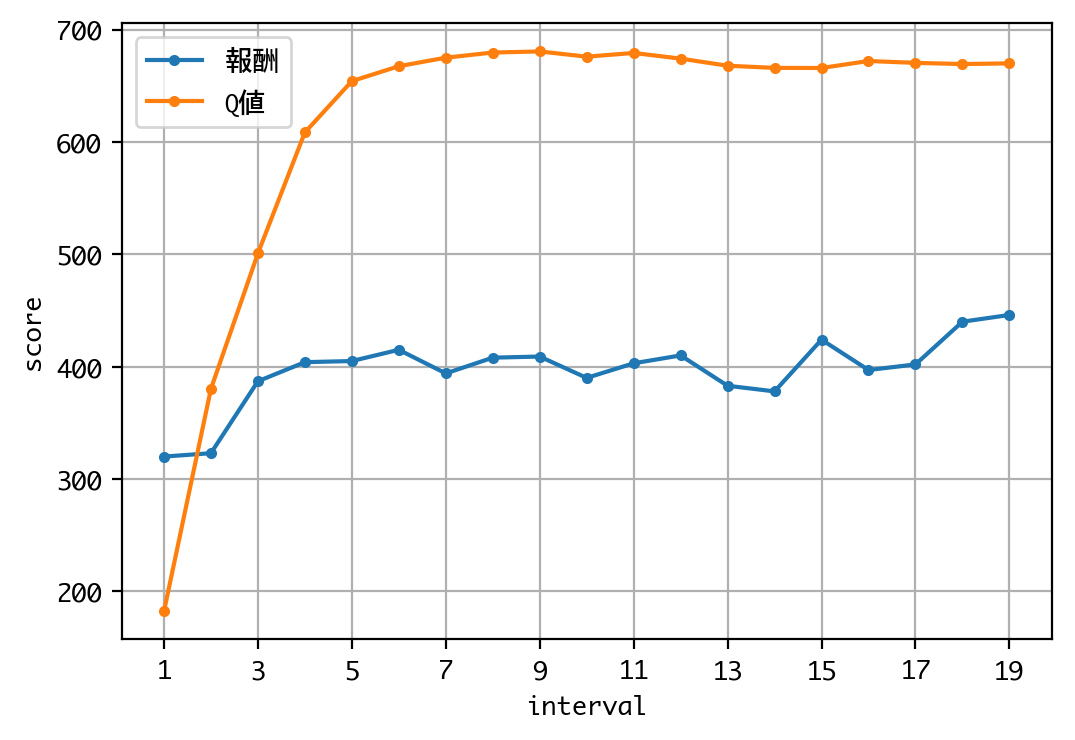

In [3]:
d = DQNMontyHall(recycle=False)
d.train(nb_steps=40000, log_interval=2000, verbose=1)

報酬（episode_reward）は、外れが0点、当たりが1000点と設定しました。したがって、667点（＝2/3）あたりに達してくれると気分的にはうれしいわけですが、パラメータtauをデフォルト値から変更し、探索させているため、そうはなりません。

他方、Q値（mean_q）は、667点前後に収束しており、学習がうまくいっていることを感じさせます。

## 訓練結果の検証

学習効果を測定し、訓練結果を検証してみましょう。まずは10回、visualizeモードで回してみます。確認ポイントは「最初に選択したドアから変更しているか」および「モンティが『はずれ（x）』と示したドアを選択していないか」の2点です。

In [4]:
d = DQNMontyHall(recycle=True)
d.test(nb_episodes=10, verbose=1, visualize=True)

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 10 episodes ...

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
|  x  |  | ??? |  | ??? |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  ( chk )  (     )

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
|  x  |  | CAR |  |  x  |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  (     )  ( chk )
Episode 1: reward: 0.000, steps: 2

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
|  x  |  | ??? |  | ??? |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  ( chk )  (     )

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
|  x  |  |  x  |  | CAR |
|     |  |     |  |     |
|-----|  |-----|  |-----|
(     )  (     )  ( chk )
Episode 2: reward: 1000.000, steps: 2

|-----|  |-----|  |-----|
|  0  |  |  1  |  |  2  |
|     |  |     |  |     |
| ??? |  | ??? |  |  x  |
|     | 

一貫して、最初に選択したドアから変更しています。しかも、モンティが「はずれ（x）」と示したドアは、一度も選択していません。うまく学習できていそうですね。

それでは、10000回転させて、勝率を確認してみましょう。

In [5]:
d = DQNMontyHall(recycle=True)
h = d.test(nb_episodes=10000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwds)/(1000 * len(rwds))
print('勝率(10000戦)：' + str(win_rate))

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(10000戦)：0.6727


勝率は67.3%。論理的に導き出される、ドアを変更した場合の勝率（＝2/3）に近い数値を叩き出していることがわかります。素晴らしい結果です。

最後にQ値——ニューラルネットワークにより近似されたQ値——を直接確認してみましょう。第1ステップ（＝初期状態）、および、第2ステップ（＝プレーヤーのドア選択とモンティのドア開放が済んだ状態）での、Q値を確認します。

In [6]:
d = DQNMontyHall(recycle=True)

def r(x):
    return round(x, 3)

state0 = [[[0., 0., 0.], [0., 0., 0.]]]
qvalues0 = d.dqn.compute_q_values(state0)
print('|ドア0のQ値|ドア1のQ値|ドア2のQ値|')
print('|:-:|:-:|:-:|')
print('|' + '|'.join(map(str, map(r, qvalues0.tolist()))) + '|')

states1 = []
states1.append([[[0., 1., 0.], [1., 0., 0.]]])
states1.append([[[0., 0., 1.], [1., 0., 0.]]])
states1.append([[[1., 0., 0.], [0., 1., 0.]]])
states1.append([[[0., 0., 1.], [0., 1., 0.]]])
states1.append([[[1., 0., 0.], [0., 0., 1.]]])
states1.append([[[0., 1., 0.], [0., 0., 1.]]])
qvalues1 = np.array([d.dqn.compute_q_values(state1) for state1 in states1])
print('|プレーヤーの選択|モンティの開放|ドア0のQ値|ドア1のQ値|ドア2のQ値|')
print('|:-:|:-:|:-:|:-:|:-:|')
print('|ドア0|ドア1|'+ '|'.join(map(str, map(r, qvalues1[0].tolist()))) + '|')
print('|ドア0|ドア2|'+ '|'.join(map(str, map(r, qvalues1[1].tolist()))) + '|')
print('|ドア1|ドア0|'+ '|'.join(map(str, map(r, qvalues1[2].tolist()))) + '|')
print('|ドア1|ドア2|'+ '|'.join(map(str, map(r, qvalues1[3].tolist()))) + '|')
print('|ドア2|ドア0|'+ '|'.join(map(str, map(r, qvalues1[4].tolist()))) + '|')
print('|ドア2|ドア1|'+ '|'.join(map(str, map(r, qvalues1[5].tolist()))) + '|')

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
|ドア0のQ値|ドア1のQ値|ドア2のQ値|
|:-:|:-:|:-:|
|649.768|668.753|654.497|
|プレーヤーの選択|モンティの開放|ドア0のQ値|ドア1のQ値|ドア2のQ値|
|:-:|:-:|:-:|:-:|:-:|
|ドア0|ドア1|303.332|-3.501|662.512|
|ドア0|ドア2|309.831|654.349|-11.096|
|ドア1|ドア0|3.51|322.213|663.669|
|ドア1|ドア2|678.181|347.039|5.519|
|ドア2|ドア0|-1.133|658.534|342.959|
|ドア2|ドア1|668.527|2.715|312.85|


まず、第1ステップのQ値は、以下のとおりです。

|ドア0のQ値|ドア1のQ値|ドア2のQ値|
|:-:|:-:|:-:|
|649.768|668.753|654.497|

理論値は、すべてのドアにつき、2/3（の定数倍）と考えられますが、なかなかよく近似できていることがわかります。ドア1のQ値が最大です。そういえば、先ほどの10回転テストで、DQNはドア1ばかりを選んでいました。

次に、第2ステップでのQ値です。

|プレーヤーの選択|モンティの開放|ドア0のQ値|ドア1のQ値|ドア2のQ値|
|:-:|:-:|:-:|:-:|:-:|
|ドア0|ドア1|303.332|-3.501|**662.512**|
|ドア0|ドア2|309.831|**654.349**|-11.096|
|ドア1|ドア0|3.51|322.213|**663.669**|
|ドア1|ドア2|**678.181**|347.039|5.519|
|ドア2|ドア0|-1.133|**658.534**|342.959|
|ドア2|ドア1|**668.527**|2.715|312.85|

すべての場合において、**プレーヤーが選択していない、かつ、モンティが開放していないドアのQ値が最大**となっています。すなわち、最初に選んだドアを変更すべきと言っています。DQNがモンティ・ホールゲームについて学習した（＝攻略法を編み出した）ことが確認できました。訓練は成功といえるでしょう。

また、モンティが開放した（＝外れと示した）ドアのQ値の低さにも注目です。そのドアを選択することが無意味であることも——探索の賜物ですが——DQNは十分に学習したようです。

## 結果のまとめ

- モンティ・ホール問題をゲーム化し、DQNにプレーさせた結果、DQNは攻略法——ドアの選択を変更——を編み出した
- その結果として、論理的に導き出される勝率（＝2/3）に近い勝率：67.3%を叩き出した
- モンティが外れと示したドアを選ぶことの無意味さについても、DQNは学習した

## 考察

結局のところ、機械学習（強化学習、Q学習）で統計的に問題を解いたという点では、[前回](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)と同じなので、何か新しい知見がもたらされたわけではありません。

また、モンティ・ホールゲームは2ステップなので、いわゆる**状態行動空間の爆発**も起こらず、よって、DQNを用いることでそれが解消することを確認できた、なんて報告もありません。

>…しかし、今回紹介したQ値に基づくアルゴリズムには大きな課題が存在します。**状態行動空間の爆発**、と呼ばれるものです。
規模の小さな環境では問題になりませんが、状態や行動が連続値で定義され、その次元も非常に大きいような環境だと、状態と行動の組に対して定義されるQ値を保存するための領域が無限に必要となってしまい、なんらかの工夫をしなければなりません。
>
>AlphaGoで使われているDeep Q-Network（DQN）では、この状態行動空間の爆発に対して、「Q値を直接表現するのではなく、ニューラルネットワークにより近似」することで対処しています。
>
>[強化学習入門 ～これから強化学習を学びたい人のための基礎知識～](http://blog.brainpad.co.jp/entry/2017/02/24/121500)より引用

しいて、本記事に意義を見い出すとすれば、「**解くべき問題を、所定のインターフェースを持つゲームに落とし込み、DQNにプレーさせる**」という問題解決法を思いつき、実行に移した、という点だと思います。

今回の例でいえば、モンティ・ホール問題という数学の問題を、所定のインターフェース——reset、step、render、観測空間、行動空間、報酬——を持つゲームに落とし込みました。ひとたびゲームに落とし込めば、あとはKeras-RLのDQNにプレーさせるだけで、攻略法を発見できる（問題解決できる）というわけです。

自由に問題を解くのも良いですが、**フレームワーク**で解くのも大切なことですよね。その点、Q学習という手法に則りつつも、自由にプログラムを書いていた[前回](https://qiita.com/tanuk1647/items/bd85b7db2176dcff9511)からの進歩かなと思います。

次回は、何か別の問題を、同じようにゲーム化してDQNに解かせてみたいと思います。今回のように、攻略法を見つけてくれるでしょうか？